---
## 0. 준비: 라이브러리 불러오기 & 데이터 읽기

먼저 도구를 꺼내고, 당뇨병 데이터를 불러옵니다.
- `pandas`: 엑셀처럼 표 데이터를 다루는 도구
- `numpy`: 숫자 계산용 도구
- `seaborn`, `matplotlib`: 그래프 그리는 도구


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

# 당뇨병 데이터 불러오기 (train.csv가 같은 세션에 업로드되어 있다고 가정)
df = pd.read_csv('/content/train (1).csv')
print('데이터 크기 (행, 열):', df.shape)
display(df.head())
df.info()

데이터 크기 (행, 열): (652, 10)


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


### 1-2. 실습: 당뇨 환자 / 비당뇨 환자 나눠보기
먼저 아주 기본적인 필터부터 연습해 봅시다.


In [3]:
# 1) 당뇨 환자(Outcome == 1)만 보기
diabetes = df[df['Outcome'] == 1]
print('당뇨 환자 수:', len(diabetes))
display(diabetes.head())

# 2) 비당뇨 환자(Outcome == 0)만 보기
non_diabetes = df[df['Outcome'] == 0]
print('비당뇨 환자 수:', len(non_diabetes))
display(non_diabetes.head())

당뇨 환자 수: 228


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1
9,TRAIN_009,1,167,74,17,144,23.4,0.447,33,1
10,TRAIN_010,4,145,82,18,0,32.5,0.235,70,1
11,TRAIN_011,8,124,76,24,600,28.7,0.687,52,1
12,TRAIN_012,4,184,78,39,277,37.0,0.264,31,1


비당뇨 환자 수: 424


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


---
## 1. 조건부 필터링: 엑셀의 "필터"를 파이썬으로 하기

### 1-1. 개념

엑셀에서 "필터" 기능을 써서

- 당뇨 환자(Outcome = 1)만 보기  
- 50세 이상이면서 당뇨인 사람만 보기  

처럼 조건을 걸어본 적이 있으시죠?

파이썬에서는 이런 걸 **조건부 필터링(conditional filtering)** 이라고 부르고,
아래와 같이 작성합니다.

```python
df[ 조건식 ]
```

예를 들어,

- `df['Outcome'] == 1`  → 당뇨 환자인 행만 `True`
- `df['Age'] >= 50`     → 50세 이상인 행만 `True`

이렇게 만들어진 `True/False` 마스크를 가지고,  
**True인 행만 골라내는 것**이 조건부 필터링입니다.

---

### 1-2. `df['Outcome'] == 0` 과 `df[df['Outcome'] == 0]` 의 차이

아래와 같은 코드를 작성했다고 해볼게요.

In [ ]:
# 1) 당뇨 환자(Outcome == 1)만 보기
diabetes = df[df['Outcome'] == 1]
print('당뇨 환자 수:', len(diabetes))
display(diabetes.head())

# 2) 비당뇨 환자(Outcome == 0)만 보기
non_diabetes = df[df['Outcome'] == 0]
print('비당뇨 환자 수:', len(non_diabetes))
display(non_diabetes.head())

여기서 핵심은 **두 단계**로 이해하는 것입니다.

#### (1) `df['Outcome'] == 0` : 조건을 계산해서 True/False만 만든 것

In [ ]:
df['Outcome'] == 0

이 코드는 **각 행이 조건을 만족하는지(True/False)** 만 계산해서  
**불리언 시리즈(Boolean Series)** 를 만들어 줍니다.

Outcome 값들이 예를 들어 이렇게 있다고 해봅시다:

| 인덱스 | Outcome |
|--------|---------|
| 0      | 1       |
| 1      | 0       |
| 2      | 0       |
| 3      | 1       |

그럼

In [ ]:
df['Outcome'] == 0

의 결과는:

```python
0    False
1     True
2     True
3    False
Name: Outcome, dtype: bool
```

- 1번, 2번 행은 Outcome이 0이어서 → `True`  
- 0번, 3번 행은 Outcome이 0이 아니어서 → `False`

즉,  
> “각 행에 대해 **조건을 만족하는지 여부만(True/False)** 표시한 결과”

일 뿐입니다.  
아직 이 시점에서는 **행이 필터링되지는 않았습니다.**

---

#### (2) `df[df['Outcome'] == 0]` : True인 행만 골라낸 새로운 데이터프레임

이제 이 True/False 결과를 **대괄호 안에 넣어서** 사용하면,

In [ ]:
non_diabetes = df[df['Outcome'] == 0]

이 코드는

1. 먼저 `df['Outcome'] == 0` 을 계산해서 `True/False` 시리즈를 만들고  
2. 그걸 이용해서 **True인 행만 남기고 False인 행은 버린 뒤**,  
3. 그 결과를 `non_diabetes`라는 새로운 데이터프레임 변수에 담습니다.

위 예시에서라면, `True`였던 인덱스 1, 2번 행만 남게 됩니다.

정리하면:

- `df['Outcome'] == 0`  
  → **“조건식의 결과(불리언 시리즈)”**  
- `df[df['Outcome'] == 0]`  
  → **“조건식에서 True인 행만 골라낸 결과 데이터프레임”**

그래서 질문하신 것처럼,

> `df['Outcome'] == 0` 는 **조건 계산**이고,  
> `df[df['Outcome'] == 0]` 는 **그 조건에서 나온 참값(True)인 행만 골라내는 코드**가 맞습니다 ✅

---

### 1-3. 두 줄로 나눠서 더 쉽게 이해하기

헷갈릴 때는 코드 자체를 **두 줄로 쪼개서** 보면 더 이해하기 좋아요.

In [ ]:
# 1) 조건(마스크)만 먼저 만든다.
mask = df['Outcome'] == 0
print(mask.head())

# 2) 그 마스크를 이용해 True인 행만 필터링한다.
non_diabetes = df[mask]
display(non_diabetes.head())

이렇게 두 단계로 나누어 보면,

1. `mask`는 True/False로만 이루어진 “필터”이고  
2. `df[mask]`는 그 필터를 적용한 최종 결과라는 구조가 눈에 들어올 거예요.

### 🔹 미니 문제 1
1. 40세 이상인 환자만 필터링해서 새로운 데이터프레임 `age_over_40`을 만들어 보세요.
2. 그 중에서 당뇨 환자(Outcome=1)만 다시 걸러서 `age_over_40_diabetes`를 만들어 보세요.
3. 두 데이터프레임의 행 수(환자 수)를 출력해 보세요.

In [11]:
# 💡 미니 문제 1 정답
age_over_40 = df[df['Age'] >= 40]
age_over_40_diabetes = age_over_40[age_over_40['Outcome'] == 1]
display(age_over_40_diabetes)
print("40세 이상 환자 수 ", len(age_over_40))
print("40세이상 환자 수 + 당뇨", len(age_over_40_diabetes))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,TRAIN_010,4,145,82,18,0,32.5,0.235,70,1
11,TRAIN_011,8,124,76,24,600,28.7,0.687,52,1
25,TRAIN_025,1,149,68,29,127,29.3,0.349,42,1
28,TRAIN_028,6,147,80,0,0,29.5,0.178,50,1
40,TRAIN_040,7,187,68,39,304,37.7,0.254,41,1
...,...,...,...,...,...,...,...,...,...,...
620,TRAIN_620,7,168,88,42,321,38.2,0.787,40,1
634,TRAIN_634,10,125,70,26,115,31.1,0.205,41,1
636,TRAIN_636,9,171,110,24,240,45.4,0.721,54,1
637,TRAIN_637,13,152,90,33,29,26.8,0.731,43,1


40세 이상 환자 수  183
40세이상 환자 수 + 당뇨 92


### 1-3. 여러 조건을 함께 쓰기: AND / OR

조건을 2개 이상 모두 만족하는 사람만 보고 싶을 때가 많습니다.

- **AND (그리고)**  → 둘 다 만족해야 함
- **OR (또는)**     → 둘 중 하나만 만족해도 됨

파이썬에서는 아래처럼 씁니다.

- AND: `&`
- OR: `|`

⚠ 주의: 조건식 전체를 괄호 `()` 로 꼭 묶어 주세요.


In [12]:
# 예시: 50세 이상 AND 당뇨 환자
cond = (df['Age'] >= 50) & (df['Outcome'] == 1)
age_over_50_diabetes = df[cond]
print('50세 이상 + 당뇨 환자 수:', len(age_over_50_diabetes))
age_over_50_diabetes.head()

50세 이상 + 당뇨 환자 수: 36


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,TRAIN_010,4,145,82,18,0,32.5,0.235,70,1
11,TRAIN_011,8,124,76,24,600,28.7,0.687,52,1
28,TRAIN_028,6,147,80,0,0,29.5,0.178,50,1
44,TRAIN_044,11,138,74,26,144,36.1,0.557,50,1
47,TRAIN_047,5,166,72,19,175,25.8,0.587,51,1


### 🔹 미니 문제 2
1. BMI(체질량지수)가 30 이상이고(비만 기준), 당뇨 환자(Outcome=1)인 사람만 필터링해서
   `obese_diabetes`라는 데이터프레임을 만들어 보세요.
2. 이들의 평균 나이와 평균 혈당(Glucose)을 계산해 보세요.


In [14]:
# 💡 미니 문제 2 정답
obese_diabetes = df[(df['BMI'] >= 30) & (df['Outcome'] == 1)]
print(f"평균 나이 {obese_diabetes['Age'].mean()}, 평균 혈당 {obese_diabetes["Glucose"].mean()}")

평균 나이 36.497297297297294, 평균 혈당 142.40540540540542



---
## 2. 그룹별 분석: groupby로 "반별 평균"처럼 요약하기

### 2-1. 개념

**groupby(그룹바이)** 는 이름은 어려워 보이지만, 사실 아주 익숙한 개념입니다.

학교에서 예를 들어보면:

- 전체 학생을 한꺼번에 보지 않고,
  - 반별 평균 점수
  - 남학생/여학생 평균 키
  - 학년별 평균 성적  
    을 구해본 적이 있죠?

이런 걸 파이썬에서는 "그룹별 요약"이라고 부르고, `groupby`를 사용합니다.

```python
df.groupby('기준컬럼')['숫자컬럼'].함수()
```

예를 들어,

- `df.groupby('Outcome')['Glucose'].mean()`  
  → 당뇨/비당뇨 그룹별 혈당 평균  
- `df.groupby('Outcome')['BMI'].median()`  
  → 당뇨/비당뇨 그룹별 BMI 중앙값  

---

### 2-2. groupby 기본 문법과 자주 쓰는 옵션

#### ✅ 기본 문법

```python
df.groupby('기준컬럼')['숫자컬럼'].함수()
```

- `'기준컬럼'` : 어떤 기준으로 묶을지 (예: 반, 성별, 연령대)
- `'숫자컬럼'` : 평균·합계 등을 구할 대상 (예: 점수, 혈당, BMI)
- `함수()`     : `mean()`, `median()`, `sum()`, `count()`, `max()`, `min()` 등

#### 🔹 단일 컬럼으로 그룹바이 예시

In [ ]:
# Outcome(당뇨 여부)별 평균 혈당
df.groupby('Outcome')['Glucose'].mean()

# Outcome별 BMI 중앙값
df.groupby('Outcome')['BMI'].median()

#### 🔹 여러 개의 통계를 한 번에 보고 싶을 때: `agg()`

In [18]:
df.groupby('Outcome')['Glucose'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Outcome,,,,
0,110.160377,107.0,197,0
1,141.004386,140.5,199,0


- 결과: Outcome=0 / Outcome=1 각각에 대해 평균, 중앙값, 최댓값, 최솟값이 한 번에 나옴

#### 🔹 행 개수 세기: `count()` vs `size()`

- `count()` : **NaN이 아닌 값만** 세어줌  
- `size()`  : NaN 포함해서 행 개수를 세어줌

In [ ]:
# Outcome별 환자 수
df.groupby('Outcome').size()

---

### 2-3. 나이대별 + 당뇨 여부별로 그룹 나눠보기

조금 더 현실적인 분석을 위해 **나이대를 구간으로 나누고**,  
그 나이대 안에서 당뇨/비당뇨 특징을 볼 수도 있습니다.

예를 들어:

- 30세 이하, 31 ~ 40세, 41 ~ 50세, 50세 이상  
  같이 나이 구간(연령대)을 만들어 봅니다.

이를 위해 `pd.cut()`과 **다중 groupby**, `unstack()`을 사용합니다.

---

#### 2-3-1. `pd.cut()`으로 나이 구간(연령대) 만들기 – 자세히 이해하기

`pd.cut()`은 연속형 숫자 데이터를 구간(카테고리)로 나누는 함수입니다.

예를 들어,

- 점수(0~100)를 → A/B/C/D 등급으로  
- 나이(0~100)를 → 연령대(20대, 30대, 40대…)로  

바꾸고 싶을 때 사용합니다.

##### ✅ 기본 형태
```python
pd.cut(데이터_시리즈, bins=구간경계리스트, labels=라벨리스트, right=True)
```

- `데이터_시리즈` : 나누고 싶은 숫자 데이터 (예: `df['Age']`)
- `bins` : 구간 경계값 리스트  
  - 예: `[0, 30, 40, 50, 100]`
  - 0 ~ 30 / 30 ~ 40 / 40 ~ 50 / 50 ~ 100 이런 식으로 나뉨
- `labels` : 각 구간에 붙일 이름 (카테고리 라벨)
- `right` : 오른쪽 경계를 포함할지 여부 (기본값 `True`)
  - `right=True`  → (30 이하, 40 이하 … 느낌, 0 < x ≤ 30)
  - `right=False` → (왼쪽 포함, 0 ≤ x < 30 이런 느낌)

##### ✅ 우리 데이터에 적용한 코드

In [ ]:
bins = [0, 30, 40, 50, 100]
labels = ['<=30', '31-40', '41-50', '50+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

이렇게 해석할 수 있습니다:

- 0 < Age ≤ 30      → '`<=30`'  
- 30 < Age ≤ 40     → '`31-40`'  
- 40 < Age ≤ 50     → '`41-50`'  
- 50 < Age ≤ 100    → '`50+`'  

→ `df['AgeGroup']`에는 이제 숫자 대신 카테고리(연령대)가 들어가게 됩니다.

##### 🔹 자주 쓰는 옵션들

- `include_lowest=True`  
  - 첫 구간의 왼쪽 끝 값도 포함하고 싶을 때 사용

In [ ]:
pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

- `ordered=True` (기본값)  
  - 카테고리 간에 **순서가 있는 것처럼** 다루게 해줌  
  - 연령대처럼 순서가 중요한 데이터에 유용

##### 🔹 작은 예시로 직관 잡기

In [ ]:
import pandas as pd

ages = pd.Series([25, 32, 47, 53, 60])

bins = [0, 30, 40, 50, 100]
labels = ['<=30', '31-40', '41-50', '50+']

age_group = pd.cut(ages, bins=bins, labels=labels, right=True)

print(ages)
print(age_group)

예상 출력(형식 예시):

```text
0    25
1    32
2    47
3    53
4    60
dtype: int64

0     <=30
1    31-40
2    41-50
3      50+
4      50+
dtype: category
Categories (4, object): ['<=30' < '31-40' < '41-50' < '50+']
```

이제 각 숫자 나이가 **그에 맞는 연령대 카테고리**로 바뀐 걸 볼 수 있습니다.

이렇게 만들어진 `AgeGroup` 컬럼을 기준으로 `groupby('AgeGroup')`을 하면  
**연령대별 평균 혈당, 연령대별 당뇨 비율** 등을 쉽게 계산할 수 있습니다.

---

#### 2-3-2. 여러 컬럼으로 그룹바이: `groupby(['AgeGroup', 'Outcome'])`

여러 기준으로 그룹을 나눌 때는 리스트를 사용합니다.

In [ ]:
df.groupby(['AgeGroup', 'Outcome'])['Glucose'].mean()

- 1차 그룹: `AgeGroup` (연령대)  
- 2차 그룹: `Outcome` (당뇨(1) / 비당뇨(0))  
- 값: 각 그룹에 속한 환자들의 `Glucose` 평균

결과는 인덱스가 2단계(다중 인덱스, MultiIndex)인 형태로 나옵니다.

---

#### 2-3-3. `unstack()`으로 표 모양 바꾸기

`groupby` 결과는 보통 **세로로 길게 정리된 형태**인데,  
보고서에서 “행은 연령대, 열은 Outcome” 같은 **가로/세로 표**로 보고 싶을 때가 많습니다.

이럴 때 `unstack()`을 사용합니다.

In [ ]:
age_outcome_glucose = (
    df
      .groupby(['AgeGroup', 'Outcome'])['Glucose']
      .mean()
      .unstack()   # Outcome을 열(columns) 방향으로 펼치기
)

display(age_outcome_glucose)

- 행(index): `AgeGroup` (<=30, 31-40, 41-50, 50+)  
- 열(columns): `Outcome` (0, 1)  
- 값(values): 각 나이대 & Outcome 조합에서의 Glucose 평균  

---

### 💻 예시 코드 전체

In [ ]:
# 나이 구간(연령대) 만들기
bins = [0, 30, 40, 50, 100]
labels = ['<=30', '31-40', '41-50', '50+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# AgeGroup x Outcome 그룹별 평균 혈당
age_outcome_glucose = (
    df
      .groupby(['AgeGroup', 'Outcome'])['Glucose']
      .mean()
      .unstack()  # Outcome 값을 열로 펼쳐서 표 형태로 보기
)

display(age_outcome_glucose)

### 2-2. 실습: 당뇨 vs 비당뇨 그룹별 평균 비교


In [ ]:
# Outcome(0=비당뇨, 1=당뇨) 그룹별 평균 혈당/나이/BMI
group_mean = df.groupby('Outcome')[['Glucose', 'Age', 'BMI']].mean()
print('Outcome 그룹별 평균값:')
display(group_mean)

### 🔹 미니 문제 3
1. Outcome(0/1) 그룹별로 **혈압(BloodPressure)** 의 평균과 중앙값을 구해보세요.
2. 어떤 그룹의 평균 혈압이 더 높은가요? 결과를 보고 한 줄로 해석해 보세요.


In [25]:
# 💡 미니 문제 3 정답
df.groupby("Outcome")['BloodPressure'].agg(["mean", "median"])

,mean,median
Outcome,,
0,68.200472,70.0
1,70.188596,74.0


### 2-3. 나이대별 + 당뇨 여부별로 그룹 나눠보기

조금 더 현실적인 분석을 위해 **나이대를 구간으로 나누고**,
그 나이대 안에서 당뇨/비당뇨 특징을 볼 수도 있습니다.

예를 들어:
- 30세 이하, 31 ~ 40세, 41 ~ 50세, 50세 이상
같이 나이 구간을 만들어 봅니다.


In [22]:
# 나이 구간(연령대) 만들기
bins = [0, 30, 40, 50, 100]
labels = ['<=30', '31-40', '41-50', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# AgeGroup x Outcome 그룹별 평균 혈
age_outcome_glucose = df.groupby(['AgeGroup', 'Outcome'])['Glucose'].mean().unstack()
display(age_outcome_glucose)

/tmp/ipython-input-315656843.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome_glucose = df.groupby(['AgeGroup', 'Outcome'])['Glucose'].mean().unstack()


Outcome,0,1
AgeGroup,,
<=30,107.233333,140.459459
31-40,114.928571,137.537313
41-50,106.533333,139.625000
50+,126.051282,152.290323


### 🔹 미니 문제 4
1. `AgeGroup`과 `Outcome`으로 그룹을 나눈 뒤, 각 그룹별 **BMI 평균**을 구해보세요.
2. 어떤 나이대에서 당뇨 환자(Outcome=1)의 BMI가 특히 높은지 찾아보세요.


In [26]:
# 💡 미니 문제 4 정답
df.groupby(["AgeGroup","Outcome"])["BMI"].mean().unstack()

/tmp/ipython-input-1410983939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["AgeGroup","Outcome"])["BMI"].mean().unstack()


Outcome,0,1
AgeGroup,,
<=30,29.991852,35.620270
31-40,30.530000,35.420896
41-50,33.817778,34.671429
50+,28.374359,32.764516


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) 나눔 폰트 설치 (Colab 전용 명령)
!apt-get update -qq
!apt-get install -qq fonts-nanum*

# 2) 폰트 등록: 파일 경로와 폰트 이름 매핑
fe = fm.FontEntry(
    fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    name="NanumGothic"
)
fm.fontManager.ttflist.insert(0, fe)  # 폰트 목록 최상단에 삽입

# 3) Matplotlib 전역 설정
plt.rcParams.update({
    "font.size": 10,
    "font.family": "NanumGothic"
})
mpl.rcParams["axes.unicode_minus"] = False  # 음수 기호 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


---
## 3. 범주형 vs 숫자형에 따라 시각화 방식 고르기

### 3-1. 개념 정리

데이터를 그림으로 볼 때, **축에 무엇이 들어가는지**에 따라 그래프 종류가 달라집니다.

1. **범주형 vs 숫자형 (카테고리별 평균/비율 비교)**  
   예: Outcome(0/1) vs Glucose 평균  
   → 보통 **막대그래프(`barplot`)** 사용  
   - x축: 범주(당뇨/비당뇨)  
   - y축: 숫자(평균 혈당)

2. **숫자형 단독 (값의 분포)**  
   예: 혈당 값 전체의 분포  
   → **히스토그램(`histplot`)** 사용  
   - “어느 구간에 값이 많이 몰려 있나?”를 보는 그래프

3. **범주형 vs 숫자형의 분포 비교**  
   예: 당뇨/비당뇨별 BMI 분포  
   → **박스플롯(`boxplot`)** 사용  
   - 중앙값, 사분위수, 이상치를 한 번에 보는 데 유리

4. **숫자형 vs 숫자형 (두 숫자 변수의 관계)**  
   예: BMI vs Glucose (혈당이 높을수록 BMI도 높나?)  
   → **산점도(`scatterplot`)** 사용  
   - 점 하나가 환자 한 명  
   - x축: 숫자, y축: 숫자  
   - 점들의 패턴을 보며 “관계가 있는지” 직관적으로 파악

5. **범주별 빈도(개수) 비교**  
   예: 당뇨(1)와 비당뇨(0) 환자 수 비교  
   → **카운트플롯(`countplot`)** 사용  
   - y축이 값이 아니라 “개수”인 막대그래프

정리하면,

- 범주 + 숫자 평균 비교 → `barplot`  
- 숫자 분포만 보기 → `histplot`  
- 범주별 숫자 분포 보기 → `boxplot`  
- 숫자 vs 숫자 관계 보기 → `scatterplot`  
- 범주별 개수 비교 → `countplot`

> 💡 **참고:**  
> - `sns.xxxplot(...)` : seaborn의 고수준 시각화 함수 (통계 요약 + 예쁜 스타일)  
> - `plt.xxx(...)` : matplotlib의 기본 그리기 함수 (제목, 축 이름, 크기 조정 등 레이아웃 설정)

---

### 3-2. 실습: Outcome별 평균 Glucose 막대그래프 (`barplot`)

**목표:**  
- 당뇨(Outcome=1) / 비당뇨(Outcome=0) 그룹의 **평균 혈당(Glucose)** 비교

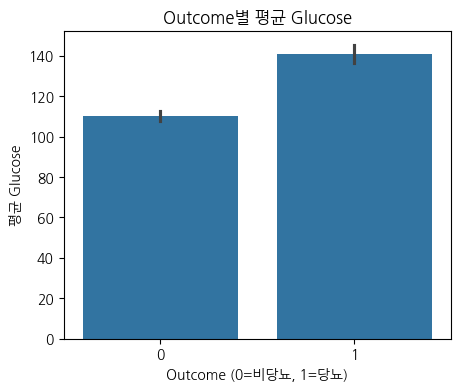

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))  # 그래프 크기 설정 (가로 5, 세로 4 인치)
sns.barplot(
    x="Outcome",            # x축에 사용할 컬럼 (범주형)
    y="Glucose",            # y축에 사용할 컬럼 (숫자형)
    data=df,                # 사용할 데이터프레임
    estimator="mean"        # 그룹별로 어떤 통계를 쓸지 (여기서는 평균)
)
plt.title("Outcome별 평균 Glucose")                 # 그래프 제목
plt.xlabel("Outcome (0=비당뇨, 1=당뇨)")            # x축 레이블
plt.ylabel("평균 Glucose")                         # y축 레이블
plt.show()                                         # 그래프 화면에 표시

#### ✅ 옵션 설명
- `plt.figure(figsize=(5, 4))` : 그래프 전체 크기(가로, 세로)를 인치 단위로 지정  
- `x="Outcome"` : x축에 Outcome(0/1) 범주 배치  
- `y="Glucose"` : y축 값으로 Glucose 사용  
- `data=df` : df에서 데이터를 가져옴  
- `estimator="mean"` : 그룹별 평균값을 막대 높이로 사용  
- `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)` : 제목과 축 이름 설정  
- `plt.show()` : 그래프를 실제로 출력

---

### 3-3. 실습: 혈당(Glucose) 분포 히스토그램 (`histplot`)

**목표:**  
- 전체 환자의 혈당이 어느 범위에 많이 몰려 있는지 보기

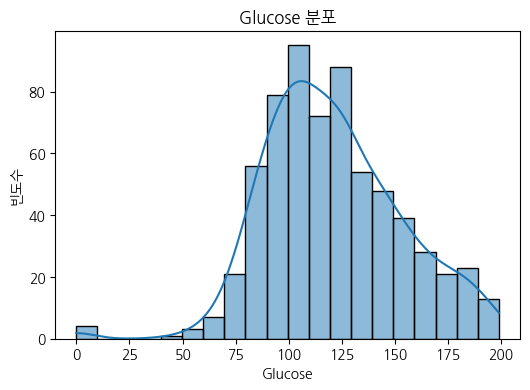

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(
    df["Glucose"],  # 시각화할 숫자 데이터 (Series)
    bins=20,        # 구간을 20개로 나눔
    kde=True        # 커널 밀도 추정선(KDE)을 함께 표시
)
plt.title("Glucose 분포")
plt.xlabel("Glucose")
plt.ylabel("빈도수")
plt.show()

#### ✅ 옵션 설명
- `sns.histplot(df["Glucose"], ...)` : Glucose 값의 분포(도수분포)를 그림  
- `bins=20` : 구간 개수(막대 개수)를 20개로 설정  
- `kde=True` : 분포의 전체적인 형태를 부드러운 선으로 추가 표시  
- `plt.figure(figsize=(6, 4))` : 히스토그램 크기 설정

---

### 3-4. 실습: Outcome별 BMI 분포 박스플롯 (`boxplot`)

**목표:**  
- 당뇨/비당뇨 그룹의 BMI 분포 차이 보기

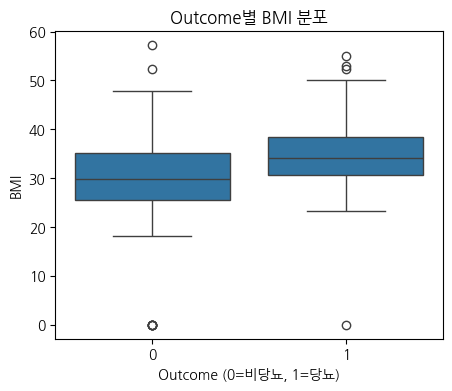

In [30]:
plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x="Outcome",   # 그룹 기준 (범주형)
    y="BMI"       # 분포를 보고 싶은 숫자형 변수
)
plt.title("Outcome별 BMI 분포")
plt.xlabel("Outcome (0=비당뇨, 1=당뇨)")
plt.ylabel("BMI")
plt.show()

#### ✅ 옵션 설명
- `sns.boxplot(x="Outcome", y="BMI", data=df)` : Outcome별 BMI 분포를 박스플롯으로 표현  
- 박스 상자: 1~3사분위 범위 (가운데 50% 데이터)  
- 박스 중앙 선: 중앙값(median)  
- 수염(whisker): 대부분 데이터 범위  
- 동그라미/점: 범위를 벗어난 이상치(outlier)  

---

### 3-5. 실습: BMI vs Glucose 산점도 (`scatterplot`)

**목표:**  
- BMI와 Glucose 두 숫자 변수 사이에 어떤 패턴이 있는지,  
- 그리고 당뇨 여부에 따라 색상으로 구분해 보기

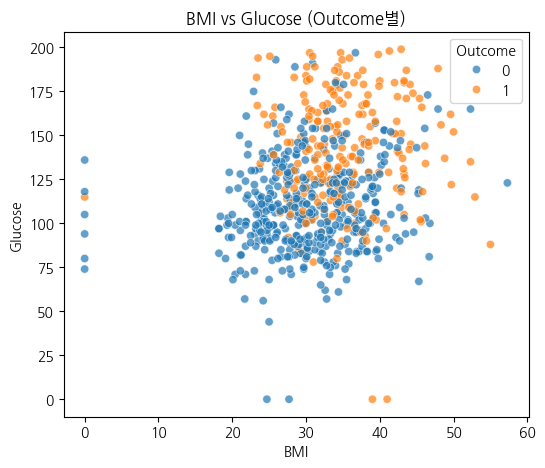

In [31]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x="BMI",         # x축에 올 숫자형 변수
    y="Glucose",     # y축에 올 숫자형 변수
    hue="Outcome",   # 색으로 구분할 범주형 변수
    data=df,
    alpha=0.7        # 점 투명도 (0~1, 1에 가까울수록 불투명)
)

plt.title("BMI vs Glucose (Outcome별)")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.show()

#### ✅ 옵션 설명
- `x="BMI"`, `y="Glucose"` : 두 숫자형 변수 간 관계를 좌표평면에 점으로 표시  
- `hue="Outcome"` : Outcome 값(0/1)에 따라 다른 색으로 구분  
- `alpha=0.7` : 점이 겹칠 때도 패턴이 잘 보이도록 약간 투명하게  

---

### 3-6. 실습: 당뇨 vs 비당뇨 환자 수 비교 (`countplot`)

**목표:**  
- 당뇨 환자(1)와 비당뇨 환자(0)의 “개수”를 바로 확인

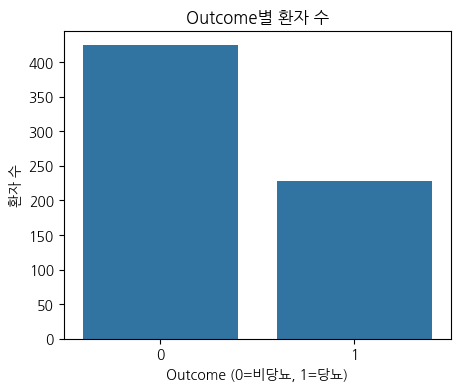

In [32]:
plt.figure(figsize=(5, 4))
sns.countplot(
    x="Outcome",  # 범주형 변수
    data=df
)
plt.title("Outcome별 환자 수")
plt.xlabel("Outcome (0=비당뇨, 1=당뇨)")
plt.ylabel("환자 수")
plt.show()

#### ✅ 옵션 설명
- `sns.countplot(x="Outcome", data=df)` : Outcome 값의 빈도(개수)를 막대그래프로 보여줌  
- y축은 자동으로 "개수(count)"가 됨 (평균 아님)  

---

### 3-7. 추가 인사이트용 그래프 아이디어

#### 1) 연령대별 당뇨 비율 막대그래프


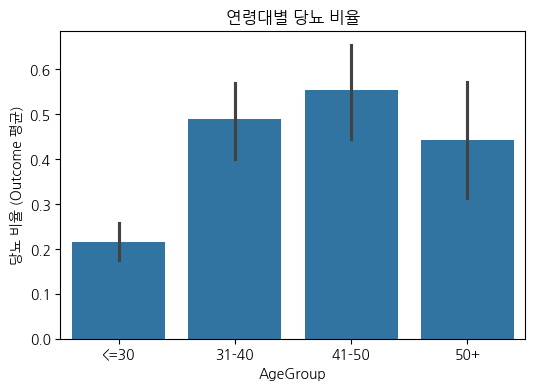

In [33]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x="AgeGroup",
    y="Outcome",   # 0/1이므로 평균 = 당뇨 비율
    data=df
)
plt.title("연령대별 당뇨 비율")
plt.xlabel("AgeGroup")
plt.ylabel("당뇨 비율 (Outcome 평균)")
plt.show()

#### 2) 연령대별 환자 수 카운트플롯

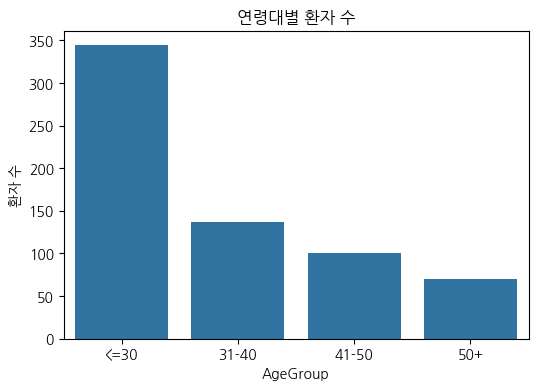

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="AgeGroup",
    data=df
)
plt.title("연령대별 환자 수")
plt.xlabel("AgeGroup")
plt.ylabel("환자 수")
plt.show()

#### 3) 연령대 + Outcome 2중 카운트

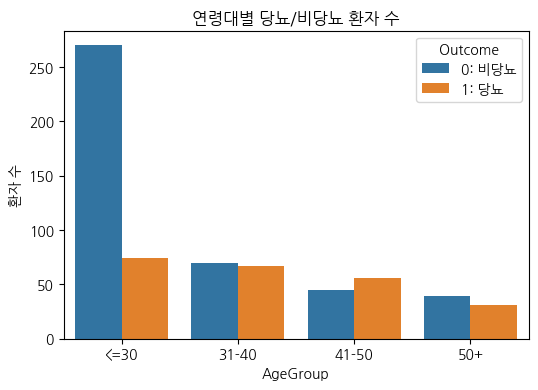

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="AgeGroup",
    hue="Outcome",  # 색으로 Outcome 구분
    data=df
)
plt.title("연령대별 당뇨/비당뇨 환자 수")
plt.xlabel("AgeGroup")
plt.ylabel("환자 수")
plt.legend(title="Outcome", labels=["0: 비당뇨", "1: 당뇨"])  # 범례 제목과 라벨 설정
plt.show()

---

## 🔹 미니 문제 (그래프 실습 + 정답 코드)

아래 문제들을 직접 코드로 그려 보면서,  
**“어떤 그래프가 어떤 질문에 어울리는지”** 감각을 익혀보세요.  
각 문제 아래에 **정답 예시 코드**도 함께 제공됩니다.

---

### 📝 미니 문제 1

> **문제:**  
> Outcome별 **평균 BMI**를 막대그래프로 그려보세요.

- x축: Outcome  
- y축: 평균 BMI  

#### ✅ 정답

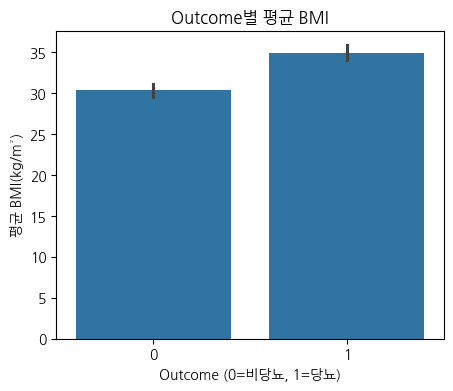

In [39]:
plt.figure(figsize=(5, 4))
sns.barplot(
    x="Outcome",
    y="BMI",
    data=df,
    estimator="mean"
)

plt.title("Outcome별 평균 BMI")
plt.xlabel("Outcome (0=비당뇨, 1=당뇨)")
plt.ylabel("평균 BMI(kg/m²)")
plt.show()

### 📝 미니 문제 2

> **문제:**  
> 당뇨/비당뇨별 Glucose 분포를 히스토그램으로 비교해 보세요.  
> (subplot을 쓰거나, `hue="Outcome"`을 사용해 한 그래프에 그려도 됩니다.)

#### ✅ 정답 : `hue`를 사용하는 한 그래프 버전

Text(0.5, 1.0, 'Outcome 별 Glucose 분포')

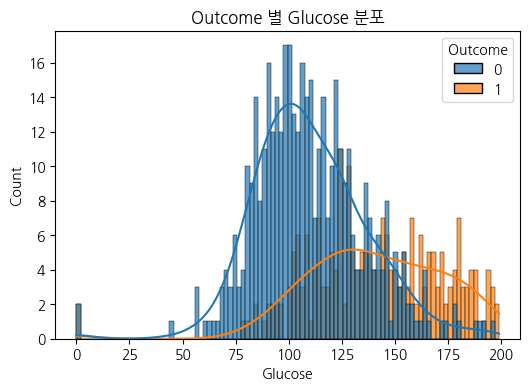

In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(
    x="Glucose",
    data=df,
    hue="Outcome",
    bins=100,
    kde=True,
    alpha=0.7
)
plt.title("Outcome 별 Glucose 분포")

#### ✅ 정답 : 서브플롯으로 나누어 그리기

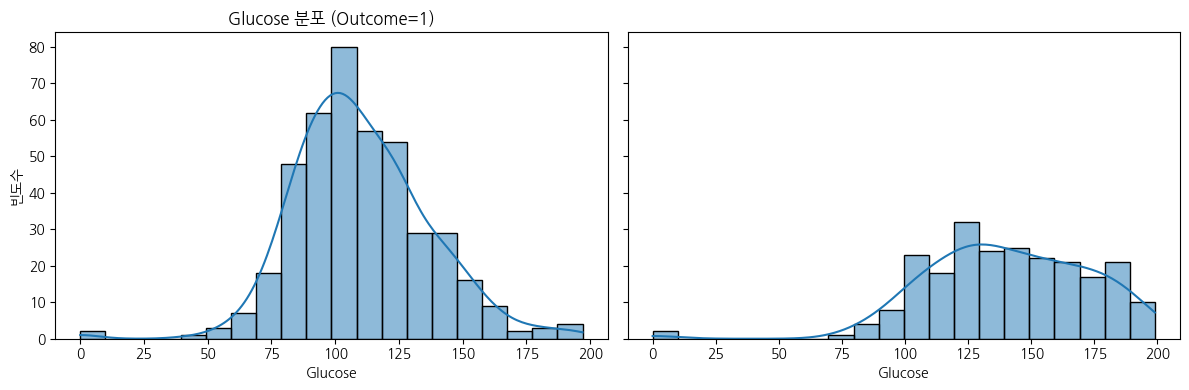

In [50]:
fig, axes = plt.subplots(1,2, figsize = (12,4), sharey=True)

sns.histplot(
    df[df["Outcome"] == 0]["Glucose"],
    bins = 20,
    kde = True,
    ax = axes[0]
)
axes[0].set_title("Glucose 분포 (Outcome=0)")
axes[0].set_xlabel("Glucose")
axes[0].set_ylabel("빈도수")

sns.histplot(
    df[df["Outcome"] == 1]["Glucose"],
    bins = 20,
    kde = True,
    ax = axes[1]
)
axes[0].set_title("Glucose 분포 (Outcome=1)")
axes[0].set_xlabel("Glucose")
axes[0].set_ylabel("빈도수")
plt.tight_layout()
plt.show()

---

### 📝 미니 문제 3

> **문제:**  
> BMI vs Age 산점도를 그리고, Outcome에 따라 색을 다르게 표시해 보세요.

- x축: Age  
- y축: BMI  
- 색상: Outcome(0/1)

#### ✅ 정답

> 해석 예시:  
> - 특정 연령대에서 Outcome=1(당뇨) 막대가 상대적으로 높다면,  
>   그 연령대에서 당뇨 예방·관리 프로그램을 강화해야 할 필요가 있다고  
>   보건소에 제안할 수 있습니다.

---

이 섹션의 목표는

> **“질문에 따라 적절한 그래프를 고를 수 있게 되는 것”** 입니다.

그래프를 고를 때는 항상 두 가지만 떠올려 보세요.

1. 축에 들어가는 게 **숫자인가, 범주인가?**  
2. 알고 싶은 것은 **평균/비율**, **분포**, **관계**, **개수** 중 무엇인가?

그러면 자연스럽게  
- barplot / histplot / boxplot / scatterplot / countplot  
중에서 무엇을 써야 할지 감이 잡힐 거예요 😄

## 이론: 상관분석이란?

### 상관(Correlation)이란?

> **두 변수(예: Glucose와 Outcome)가 함께 움직이는 정도**를 숫자로 나타낸 것

예를 들어,

- 키가 큰 사람일수록 몸무게가 큰 편이다 → **양의 상관관계(+)**
- 운동량이 많을수록 체지방률이 줄어든다 → **음의 상관관계(–)**
- 신발 사이즈와 혈압은 거의 관련이 없다 → **상관 거의 0**

의학/헬스케어 예시:

- **Glucose(혈당)** ↑ → 당뇨 발생(Outcome=1) ↑ (양의 상관 가능)
- **BMI(비만 정도)** ↑ → 고혈압/당뇨 비율 ↑ (양의 상관 가능)

즉, 상관분석은 **“어떤 변수들이 함께 움직이는 경향이 있는지”** 파악하는 도구입니다.


### 상관계수의 범위

가장 많이 쓰는 상관계수는 **피어슨 상관계수(Pearson correlation)** 입니다.

상관계수 \( r \) 의 범위는 다음과 같습니다.

- \( r = 1 \)  
  → 완벽한 **양의 상관**  
  → A가 증가하는 방향과 B가 증가하는 방향이 완전히 일치

- \( r = -1 \)  
  → 완벽한 **음의 상관**  
  → A가 증가할 때 B는 반대로 정확히 감소

- \( r = 0 \)  
  → **선형 관계 없음**  
  → “아예 관련이 없다”라기보다는 “일직선 패턴은 보이지 않는다” 정도로 이해

대략적인 해석(절댓값 기준):

- 0.7 ~ 1.0 : 강한 상관 (Strong)
- 0.3 ~ 0.7 : 어느 정도 상관 (Moderate)
- 0.0 ~ 0.3 : 약한 상관 (Weak)

> ⚠️ **중요: 상관 ≠ 인과**  
> Glucose와 Outcome의 상관이 높다고 해서  
> “Glucose가 Outcome의 원인이다”라고 단정할 수는 없습니다.  
> 상관은 어디까지나 “함께 움직이는 경향”을 알려줄 뿐입니다.

### 2-3. 상관과 공분산의 차이

- **공분산(Covariance)**: 두 변수가 어떻게 같이 변하는지 나타내지만,  
  단위와 스케일에 영향을 많이 받아 **숫자 크기만 봐서는 해석이 어렵습니다.**
- **상관계수(Correlation)**: 공분산을 각 변수의 표준편차로 나누어  
  **–1 ~ 1 사이로 정규화**한 값 → 비교·해석하기 좋습니다.

실무에서는 거의 항상 **“상관계수”만 본다**고 생각하셔도 좋습니다.



## Pandas로 상관계수 구하기
### `df.corr()` 기본 사용법

Pandas의 `DataFrame.corr()`는 **숫자형 컬럼들끼리의 상관계수를 한 번에 계산**해 줍니다.

```python
corr_matrix = df.corr()
```

- `corr_matrix`는 **행·열이 모두 컬럼 이름인 행렬(표)** 이 됩니다.
- 행과 열의 교차점 값 = 해당 두 변수 사이의 상관계수입니다.

In [4]:
# 숫자형 컬럼들의 상관행렬 계산
df = df.drop(columns = ["ID"])
corr_matrix = df.corr()  # 기본 method="pearson"
display(corr_matrix)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.103449,0.148058,-0.084128,-0.087169,0.042233,-0.028958,0.511983,0.211340
Glucose,0.103449,1.000000,0.142046,0.071173,0.336526,0.224301,0.125244,0.242086,0.460108
BloodPressure,0.148058,0.142046,1.000000,0.218961,0.091818,0.265858,0.014207,0.225234,0.049459
SkinThickness,-0.084128,0.071173,0.218961,1.000000,0.436097,0.365557,0.170572,-0.108915,0.052094
Insulin,-0.087169,0.336526,0.091818,0.436097,1.000000,0.189895,0.201508,-0.052231,0.123246
BMI,0.042233,0.224301,0.265858,0.365557,0.189895,1.000000,0.095714,0.038796,0.294390
DiabetesPedigreeFunction,-0.028958,0.125244,0.014207,0.170572,0.201508,0.095714,1.000000,0.035520,0.173584
Age,0.511983,0.242086,0.225234,-0.108915,-0.052231,0.038796,0.035520,1.000000,0.218183
Outcome,0.211340,0.460108,0.049459,0.052094,0.123246,0.294390,0.173584,0.218183,1.000000


### 특정 타깃(Outcome)과의 상관만 보고 싶을 때

당뇨 데이터에서는 보통 **Outcome(0/1)** 을 타깃으로 봅니다.

```python
corr_with_outcome = corr_matrix["Outcome"].sort_values(ascending=False)
```

이렇게 하면 Outcome과 각 변수의 상관계수를 **내림차순으로 정렬**해서 볼 수 있습니다.

In [58]:
# Outcome과의 상관계수만 추출해서 내림차순 정렬
corr_with_outcome = corr_matrix["Outcome"].sort_values(ascending=False)

print("=== Outcome과 각 변수의 상관계수 ===")
display(corr_with_outcome)

=== Outcome과 각 변수의 상관계수 ===


,Outcome
Outcome,1.000000
Glucose,0.460108
BMI,0.294390
Age,0.218183
Pregnancies,0.211340
DiabetesPedigreeFunction,0.173584
Insulin,0.123246
SkinThickness,0.052094
BloodPressure,0.049459



### `method` 옵션 (Pearson / Spearman / Kendall)

기본적으로는 `method="pearson"` 이 사용됩니다.

```python
df.corr(method="pearson")   # 연속형 변수, 선형 관계에 적합 (기본)
df.corr(method="spearman")  # 순위(랭크) 기반 상관 - 비선형/순서 데이터에 유리
df.corr(method="kendall")   # 순위 기반 다른 방식
```

헬스케어 데이터 초반 학습 단계에서는 **`pearson`만 잘 써도 충분**합니다.

In [2]:
# Spearman 상관계수 예시 (선택적으로 실행해보세요)
spearman_corr = df.corr(method="spearman")
print("=== Spearman 상관계수 행렬 (일부) ===")
display(spearman_corr.head())

ValueError: could not convert string to float: 'TRAIN_000'

## Seaborn으로 상관계수 히트맵 그리기

상관행렬을 숫자 표로만 보면 한눈에 들어오기 어렵습니다.  
그래서 **색깔로 표현하는 히트맵(heatmap)** 을 자주 사용합니다.

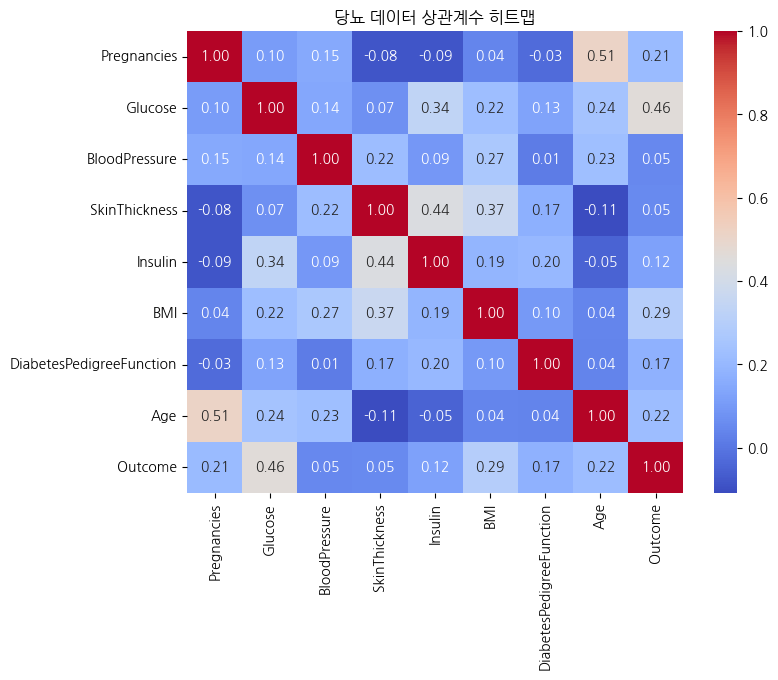

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,   # 칸 안에 수치 표시
    fmt=".2f",    # 소수 둘째 자리까지
    cmap="coolwarm"  # 파랑-빨강 계열 색상
)
plt.title("당뇨 데이터 상관계수 히트맵")
plt.show()

### 히트맵 해석 팁

- 색이 **진한 빨간색**에 가까울수록 → 양의 상관이 크다 (함께 증가하는 경향)
- 색이 **진한 파란색**에 가까울수록 → 음의 상관이 크다 (한쪽이 증가할 때 다른 쪽은 감소)
- 색이 **흰색/연한색**에 가까울수록 → 상관이 약하다

질문 예시:
- Outcome과 가장 진하게 연결된 변수는 무엇인가?
- 서로 상관이 너무 높은 변수 쌍은 없는가? (예: 다중공선성 관점)

## 연습 문제 (Mini Quiz)

아래 문제를 통해 상관분석 개념과 코드를 직접 연습해 봅시다.

### 📝 문제 1. Outcome과의 상관계수 해석하기

1. `df.corr()`로 상관행렬을 구하고, `Outcome`과의 상관계수를 내림차순으로 정렬해서 출력해보세요.  
2. 그 중 **상관계수가 가장 큰 2개 변수**를 찾아, 왜 이런 결과가 나왔을 것 같은지 자신의 말로 이유를 적어보세요.

아래 셀에서 직접 작성해보세요.

In [62]:
# 1) 상관행렬 구하기
corr_matrix = df.corr()

# 2) Outcome과의 상관계수를 내림차순 정렬
corr_with_outcome = corr_matrix["Outcome"].sort_values(ascending=False)
display(corr_with_outcome)
# 3) 가장 상관계수가 큰 2개 변수는 무엇인가요?
#  -> 출력 결과를 보고 마크다운 셀에 해석을 적어보세요.

,Outcome
Outcome,1.000000
Glucose,0.460108
BMI,0.294390
Age,0.218183
Pregnancies,0.211340
DiabetesPedigreeFunction,0.173584
Insulin,0.123246
SkinThickness,0.052094
BloodPressure,0.049459


### Glucose, BMI 가장 큰 변수 이다.
### 아직 전처리 하지 않아서 결과가 위 같은 결과가 나왔는데 전처리를 하고 결과를 봐야 할 것 같고, 저 상태에서는 상관관계가 가장 작은 것은 BloodPressure 이다.


*   Glucose, BMI -> 혈당 수치와 BMI지수가 높을수록 당뇨 진단 가능성이 높아서일 수 있다.
*   SkinThickness, BloodPressure -> 피부 두께, 혈압이랑 상관 관계가 작다고 나온다




> ✏️ **해석 예시(직접 적어보기)**  
> - 예시: Glucose와 Outcome의 상관이 가장 크다 → 혈당 수치가 높을수록 당뇨 진단 가능성이 높아서일 수 있다.  
> - 예시: BMI도 Outcome과 양의 상관을 보인다 → 비만도가 높을수록 당뇨 위험이 증가한다는 기존 의학 지식과도 부합한다.

### 📝 문제 2. 피처 2개만 골라 상관분석 + 산점도

1. `["Glucose", "BMI"]` 두 컬럼만 뽑아서 상관행렬을 구해보세요.  
2. 산점도(`scatterplot`)를 그려서, 상관계수 값과 그림이 잘 맞는지 눈으로 확인해보세요.

=== Glucose & BMI 상관행렬 ===


,Glucose,BMI
Glucose,1.000000,0.224301
BMI,0.224301,1.000000


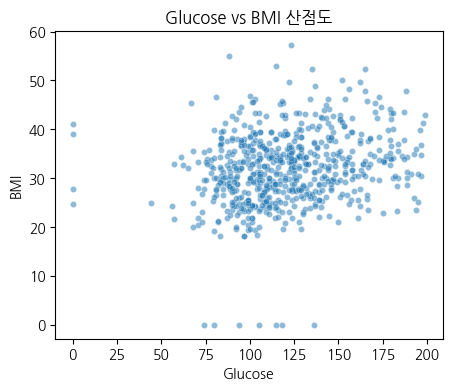

In [87]:
# 1) 두 컬럼만 상관행렬 계산
cols = ["Glucose", "BMI"]
corr_matrixs = df[cols].corr()
print("=== Glucose & BMI 상관행렬 ===")
display(corr_matrixs)

# 2) 산점도 그리기
plt.figure(figsize=(5, 4))
sns.scatterplot(
    x="Glucose",
    y="BMI",
    data=df,
    alpha=0.5,
    s = 20
)
plt.title("Glucose vs BMI 산점도")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

# 상관계수와 산점도의 모양을 비교해 보세요.

### 📝 문제 3. 상관계수만 보고 잘못된 결론 내리기 방지 (개념 문제)

다음 중 **틀린 해석**을 골라보세요.

1. Glucose와 Outcome의 상관계수가 0.45이므로,  
   “혈당 수치가 높을수록 당뇨 여부와 관련이 있어 보인다”라고 말할 수 있다.
2. BMI와 Outcome의 상관계수가 0.3이므로,  
   “BMI가 높을수록 당뇨 위험이 증가하는 경향이 있다”고 말할 수 있다.
3. Age와 Outcome의 상관계수가 0.1이므로,  
   “Age는 Outcome의 원인(인과관계)이 아니다”라고 확실하게 말할 수 있다.

#### ✅ 정답 & 해설

정답 : 3번
상관계수가 작다고 원인이 아니라고 확실하게 말할 수는 없다.



#정답을 작성해주세요

### 📝 문제 4. 히트맵에서 인사이트 찾기

1. 상단에서 만든 `corr_matrix` 를 이용해 `heatmap`을 다시 한 번 출력해보세요.  
2. 그 중,
   - (1) 서로 상관이 **높은 두 변수 쌍** 1개  
   - (2) Outcome과의 상관이 **가장 낮은 변수** 1개  
   를 찾아서, 이 두 가지를 마크다운 셀에 글로 설명해보세요.

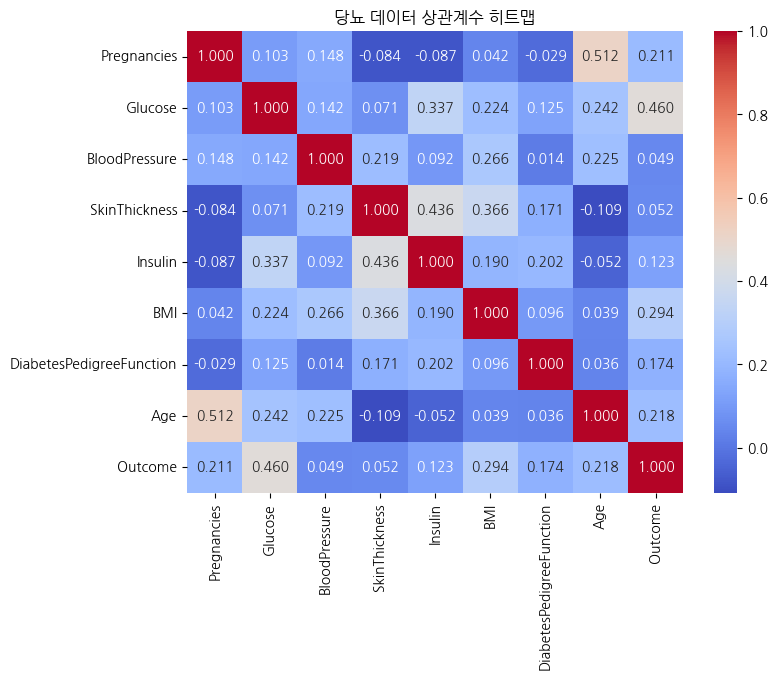

In [9]:
# 문제 4: 히트맵 다시 그리기 (원하면 다시 실행)
# df.drop(columns = ["ID"])
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,   # 칸 안에 수치 표시
    fmt=".3f",    # 소수 둘째 자리까지
    cmap="coolwarm"  # 파랑-빨강 계열 색상
)
plt.title("당뇨 데이터 상관계수 히트맵")
plt.show()

### 1. Pregnancies - Age가장 높습니다.(자기자신을 제외하면)
### 2. BloodPressure 가 Outcome과의 상관이 가장 낮은 변수입니다.

> ✏️ **인사이트 예시 (직접 채워보세요)**  
> - 예시: Glucose와 Outcome의 상관이 가장 크다. 혈당이 높을수록 당뇨 가능성이 높아지는 경향이 보인다.  
> - 예시: Pregnancies와 어떤 변수의 상관이 거의 0에 가깝다. 이 데이터에서는 두 변수 간 선형 관계가 거의 없어 보인다.

## 6. 정리

- 상관계수는 두 변수가 **얼마나 같이 움직이는지**를 –1 ~ 1 사이로 표현한 값입니다.
- `df.corr()`로 숫자형 변수들 간 상관을 한 번에 볼 수 있습니다.
- `sns.heatmap()`으로 상관행렬을 색깔로 표현하면 인사이트를 빨리 얻을 수 있습니다.
- 하지만, **상관이 있다고 해서 인과관계가 있다고 단정할 수는 없습니다.**  
  상관분석은 “어디에 주목해야 할지”를 알려주는 첫 단계 도구입니다.